In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm
import itertools

# plt.style.use('fivethirtyeight')
# %matplotlib inline
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 13, 8

import plotly.express as px

# import collections

import functions as fun



import datetime
import seaborn as sns
sns.set()

In [ ]:
%load_ext autoreload
%autoreload

In [ ]:
%reload_ext autoreload

In [605]:
df = pd.read_csv('chicago_melted.csv')
df.head()

,ZipCode,Time,Value
0,60657,2011-01-01,729300.0
1,60614,2011-01-01,923000.0
2,60640,2011-01-01,600000.0
3,60647,2011-01-01,286500.0
4,60618,2011-01-01,317400.0


In [319]:
zip_ts = df.loc[df['ZipCode']==60647].drop(['ZipCode'],axis=1)
# zip_ts['Time'] = pd.to_datetime(zip_ts['Time'], format='%Y-%m')
zip_ts.set_index('Time', inplace = True)
zip_ts.head()

,Value
Time,
2011-01-01,286500.0
2011-02-01,285800.0
2011-03-01,283800.0
2011-04-01,282100.0
2011-05-01,281700.0


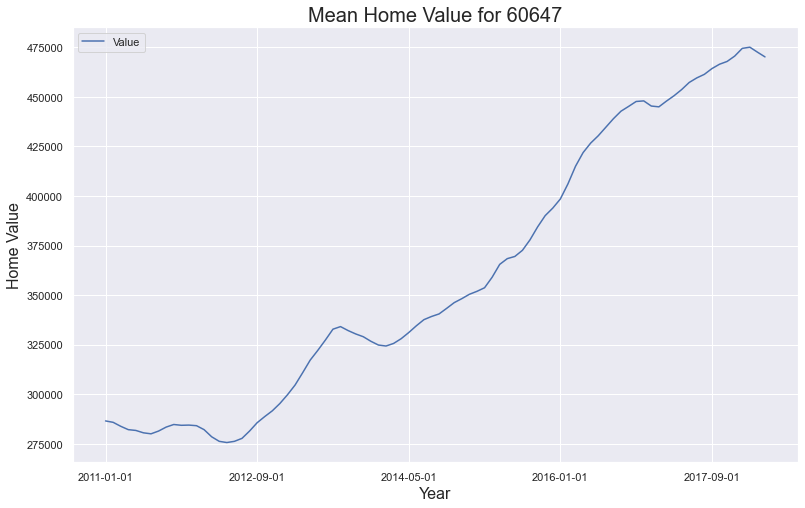

In [320]:
zip_ts.plot(figsize=(13, 8))
plt.xlabel("Year", fontsize=16)
plt.ylabel("Home Value", fontsize=16)
plt.title("Mean Home Value for 60647", fontsize=20)
plt.show()

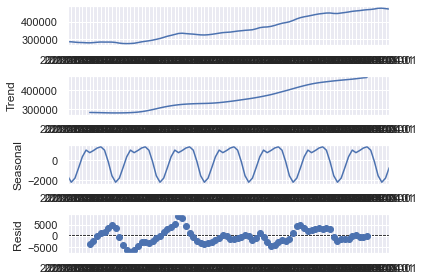

In [321]:
decomposition = sm.tsa.seasonal_decompose(zip_ts, model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [322]:
# mul_decomposition = sm.tsa.seasonal_decompose(zip_ts, model='mul', period=12)
# fig = mul_decomposition.plot()
# plt.show()

In [323]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as tsa

In [324]:
def df_decompose(df):
    
    trend = seasonal_decompose(df, period=12, model='additive').trend
    seasonal = seasonal_decompose(df, period=12, model='additive').seasonal
    residual = seasonal_decompose(df, period=12, model='additive').resid

 
    plt.figure(figsize=(12,8))
    plt.title(f"Decomposition for {df}")
    plt.subplot(411)
    plt.plot(df, label='Original', color="blue")
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color="blue")
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality', color="blue")
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color="blue")
    plt.legend(loc='best')
    plt.tight_layout();
    
    return residual.dropna()

### Used an additive model for decomp becaue the trend is more linear and constant over time

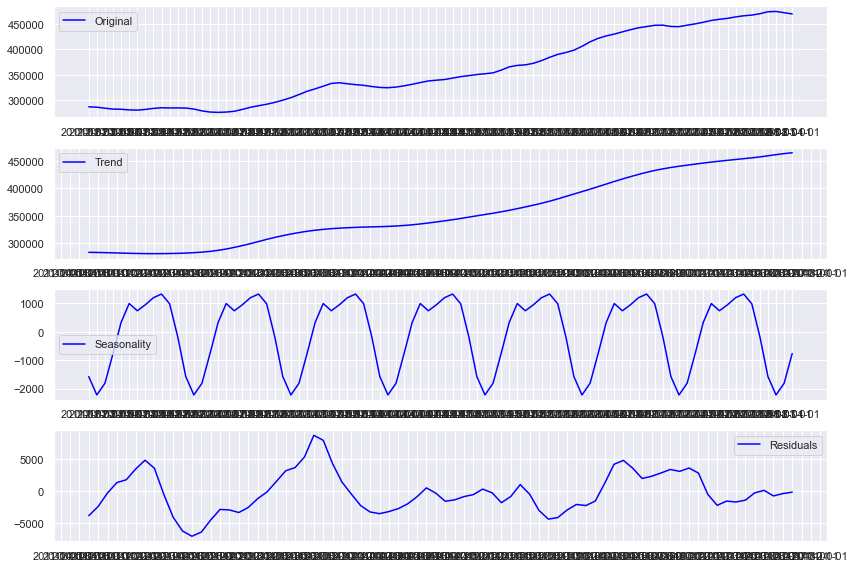

In [325]:
zip_decomp = df_decompose(zip_ts)

In [326]:
def stationarity_check(TS, rolling_window=7):    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = rolling_window, center = False).mean()
    rolstd = TS.rolling(window = rolling_window, center = False).std()
    

    dftest = adfuller(TS) 

    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xticks(rotation=70)
    plt.show(block=False)

    print ('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    pass

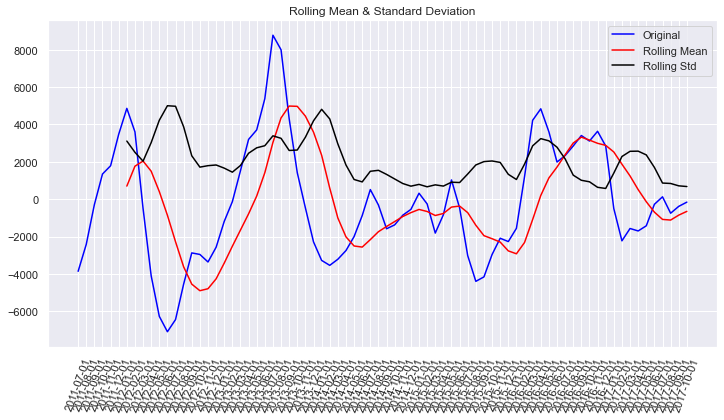

Results of Dickey-Fuller Test:
Test Statistic                 -3.285489
p-value                         0.015540
#Lags Used                      8.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


In [327]:
stationarity_check(zip_decomp)

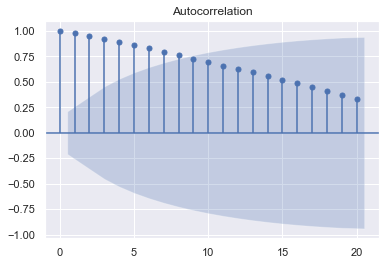

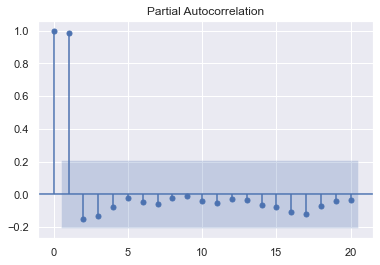

In [328]:
tsa.plot_acf(zip_ts);
tsa.plot_pacf(zip_ts);

We can see on our ACF plots that for most data there is a significant positive correlation up to around 8 lags. This will instruct us on what could be a good order for our MA parameter.

On our PACF plots we see that we might be dealing with an AR order of 1 or 2 for most data.

In [621]:
zip_ts.index = pd.to_datetime(zip_ts.index, format='%Y-%m')
zip_ts.head()

,Value
Time,
2011-01-01,286500.0
2011-02-01,285800.0
2011-03-01,283800.0
2011-04-01,282100.0
2011-05-01,281700.0


In [622]:
zip_ts.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [623]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Tested model first with a time series of one zipcode.

In [624]:
ans = []
for para1 in pdq:
        for para2 in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(zip_ts,
                                                order = para1,
                                                seasonal_order = para2,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                output = mod.fit()
                ans.append([para1, para2, output.aic])
                print('Result' + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(para1, para2, output.aic))
            except:
                continue

Result ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 2478.2981972001576
Result ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 2102.3771986902475
Result ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 1787.1019735095606
Result ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1513.2253783709482
Result ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 1720.2754099557158
Result ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 1671.8928801546938
Result ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 1500.905134485364
Result ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 2027.032044432856
Result ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 2390.711926639102
Result ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 2194.26250536535
Result ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 1794.814974692212
Result ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2181.2849301789174
Result ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated 

In [625]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df

,pdq,pdqs,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",2478.298197
1,"(0, 0, 0)","(0, 0, 1, 12)",2102.377199
2,"(0, 0, 0)","(0, 1, 0, 12)",1787.101974
3,"(0, 0, 0)","(0, 1, 1, 12)",1513.225378
4,"(0, 0, 0)","(1, 0, 0, 12)",1720.275410
...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 12)",1091.352307
60,"(1, 1, 1)","(1, 0, 0, 12)",1267.949306
61,"(1, 1, 1)","(1, 0, 1, 12)",1253.674758
62,"(1, 1, 1)","(1, 1, 0, 12)",1106.586250


In [626]:
best_param = ans_df.loc[ans_df['aic'].idxmin()]
best_param

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           1090.54
Name: 63, dtype: object

In [628]:
# Predictions

ARIMA_MODEL = sm.tsa.statespace.SARIMAX(zip_ts, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

    
output = ARIMA_MODEL.fit()    


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6595      0.124      5.308      0.000       0.416       0.903
ma.L1          0.8941      0.104      8.627      0.000       0.691       1.097
ar.S.L12       0.0688      0.046      1.503      0.133      -0.021       0.158
ma.S.L12      -0.0613      0.137     -0.448      0.654      -0.329       0.207
sigma2      3.494e+06   9.06e-09   3.86e+14      0.000    3.49e+06    3.49e+06


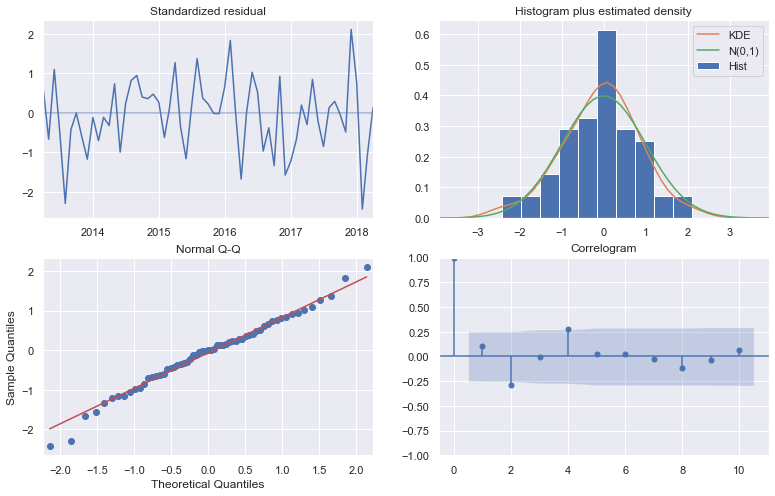

In [630]:
print(output.summary().tables[1])
output.plot_diagnostics(figsize=(13,8));

In [631]:
# predictions starting from 2015-04-01 
pred = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic=False)
pred_conf = pred.conf_int()

Passing dynamic=False means that forecasts at each point are generated using the full history up to that point (all lagged values).

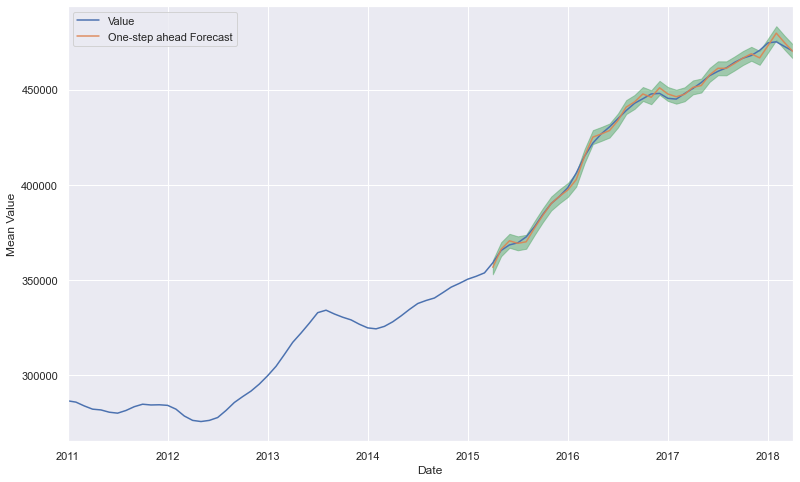

In [632]:
ax = zip_ts['2011':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, figsize=(13 ,8), label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')
plt.legend()

plt.show()

In [634]:
chi_forecasted = pd.DataFrame(pred.predicted_mean)
chi_truth = zip_ts['2015-04-01':]

mse = ((chi_forecasted.values - chi_truth.values) ** 2).mean()
rmse = np.sqrt(((chi_forecasted.values - chi_truth.values)**2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 3323693.12
The RMSE of our forecasts is 1823.1


In [635]:
# dynamic predictions 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

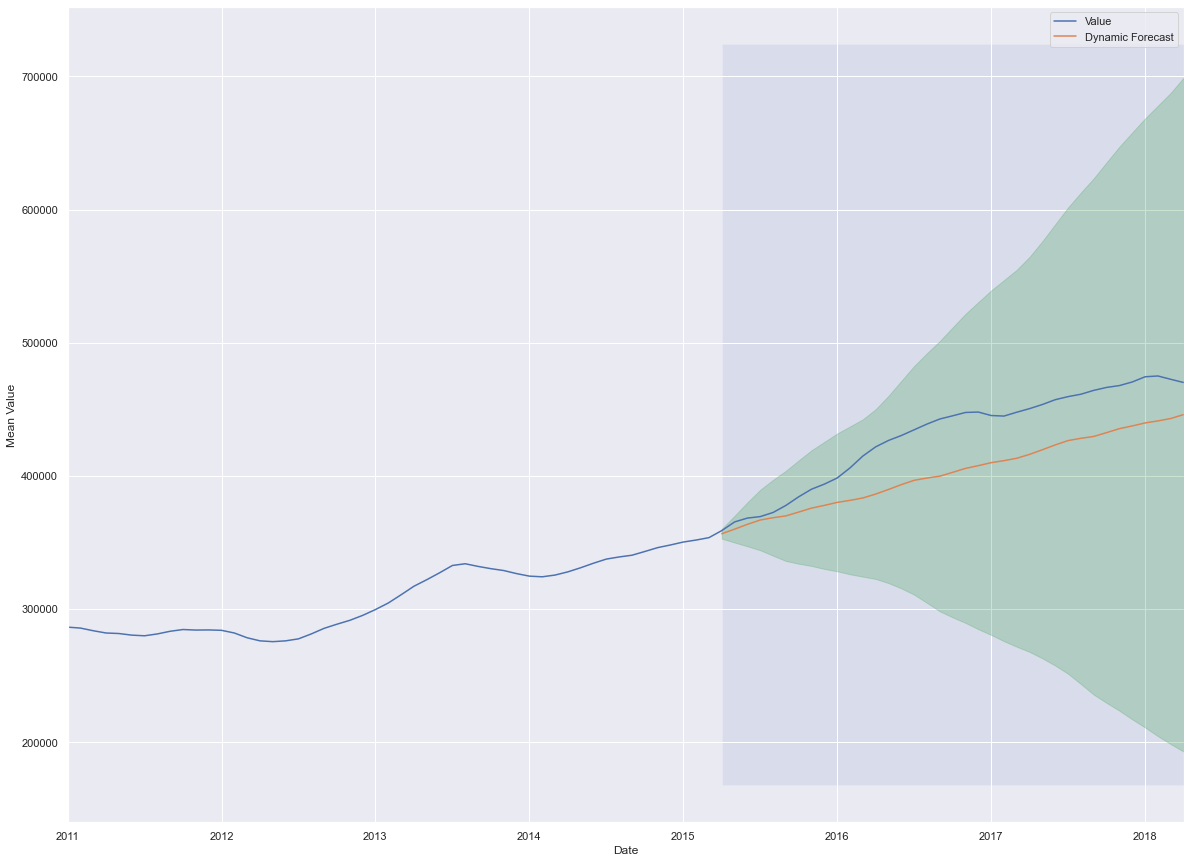

In [636]:
# dynamic forecast 
ax = zip_ts['2011':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-04-01'),
                 chi_forecasted.index[-1], 
                 alpha=.1, 
                 zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')

plt.legend()
plt.show()

In [637]:
# Dynamic 
chi_forecasted = pd.DataFrame(pred_dynamic.predicted_mean)
chi_truth = zip_ts['2015-04-01':]


mse = ((chi_forecasted.values - chi_truth.values) ** 2).mean()
rmse = np.sqrt(((chi_forecasted.values - chi_truth.values)**2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 925685607.17
The RMSE of our forecasts is 30425.08


In [638]:
# forecast 36 steps (3 years)
prediction = output.get_forecast(steps=36)

pred_conf = prediction.conf_int()

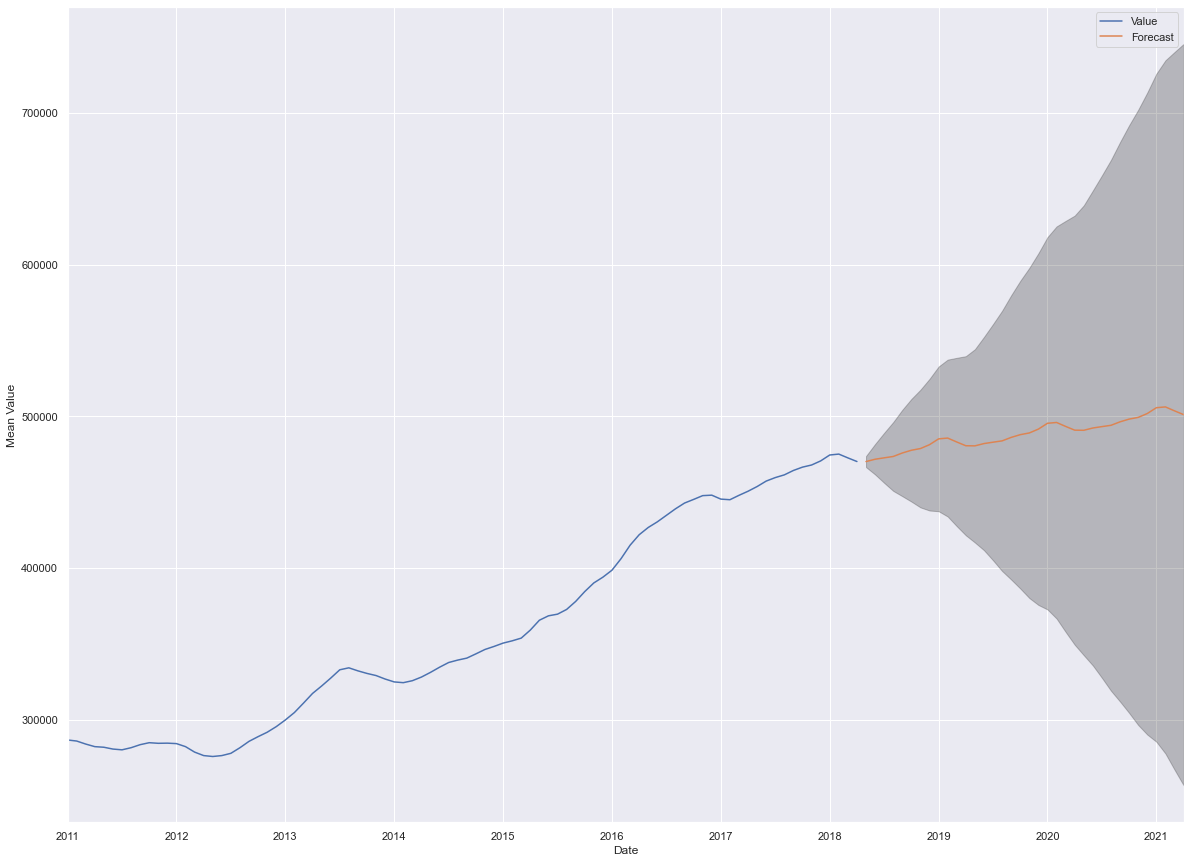

In [639]:
# 3-year predictions
ax = zip_ts.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Mean Value')

plt.legend()
plt.show()

In [288]:
# final forecast 
forecast_table = pd.DataFrame()
current = []
forecast_3Yr = []
forecast_5Yr = []

pred_3 = output.get_forecast(steps = 36)
pred_conf_3 = pred_3.conf_int()
forecast_3 = pred_3.predicted_mean.to_numpy()[-1]
forecast_3Yr.append(forecast_3)
current.append(zip_ts.Value[-1])
    

forecast_table['Current Value'] = current
forecast_table['3 Years Value'] = forecast_3Yr
forecast_table['3Yr-ROI']=((forecast_table['3 Years Value'] 
                           - forecast_table['Current Value'])/forecast_table['Current Value']*100)

In [289]:
forecast_table.sort_values('3Yr-ROI', ascending=False).head()

,Current Value,3 Years Value,3Yr-ROI
0,470200.0,501153.317961,6.583011


In [291]:
zip_truth = zip_ts['2015-04':]
zip_forecasted = pred.predicted_mean

mse = ((zip_forecasted - zip_truth) ** 2).mean()
rmse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The RMSE of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 1823.1


In [290]:
chi_forecasted = pd.DataFrame(pred_dynamic.predicted_mean)
chi_truth = zip_ts['2015-04':]

mse = mean_squared_error(zip_truth, zip_forecasted)
rmse = np.sqrt(mean_squared_error(zip_truth, zip_forecasted))
print(f'The Root Mean Squared Error of our forecasts is {round(rmse, 3)}')
print(f'The Mean Squared Error of our forecasts is {round(mse, 3)}')

The Root Mean Squared Error of our forecasts is 1823.1


In [339]:
df_copy = df.copy()

In [606]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m')
df.set_index('Time', inplace = True)
df.head()

,ZipCode,Value
Time,,
2011-01-01,60657,729300.0
2011-01-01,60614,923000.0
2011-01-01,60640,600000.0
2011-01-01,60647,286500.0
2011-01-01,60618,317400.0


In [607]:
zip_dfs = []
zip_list = df.ZipCode.unique()
for x in zip_list:
    zip_dfs.append(pd.DataFrame(df[df['ZipCode']==x][['Value']].copy()))

In [608]:
zip_dfs[4]

,Value
Time,
2011-01-01,317400.0
2011-02-01,316300.0
2011-03-01,314000.0
2011-04-01,311400.0
2011-05-01,308200.0
...,...
2017-12-01,457900.0
2018-01-01,457400.0
2018-02-01,459000.0


In [356]:
zip_list

array([60657, 60614, 60640, 60647, 60618, 60613, 60629, 60625, 60619,
       60610, 60620, 60634, 60626, 60649, 60616, 60622, 60615, 60641,
       60660, 60608])

In [344]:
train = df.loc['2011-01-01':'2015-03-01']
test = df.loc['2015-04-01':]

In [ ]:
train.head()
# test.head()

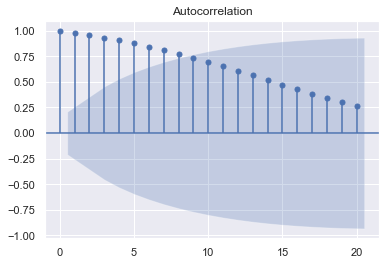

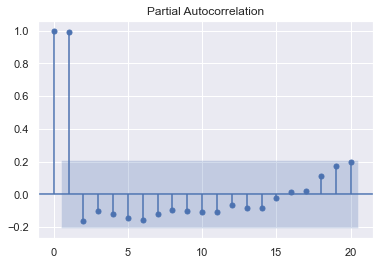

In [642]:
plot_acf(zip_dfs[4]);
plot_pacf(zip_dfs[4]);

In [384]:
auto_arima(df['Value'],seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1760
Model:             SARIMAX(0, 1, 1)x(2, 0, [], 12)   Log Likelihood              -24654.141
Date:                             Wed, 11 Nov 2020   AIC                          49318.282
Time:                                     16:21:06   BIC                          49345.644
Sample:                                          0   HQIC                         49328.394
                                            - 1760                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -250.0453    420.729     -0.594      0.552   -1074.659     574.568
ma.L1         -0.9860      0.018    -55.988      0.000      -1.020      -0.951
ar.S.L12      -0.1829      0.030     -6.092      0.000      -0.242      -0.124
ar.S.L24       0.1355      0.038      3.600      0.000       0.062       0.209
sigma2      1.088e+11   1.07e-05   1.02e+16      0.000    1.09e+11    1.09e+11
===================================================================================
Ljung-Box (Q):                     4231.56   Jarque-Bera (JB):               407.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.74   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+31. Standard errors may be unstable.
"""

In [447]:
ans = []
for train, name in zip(train_zip_dfs, zip_list):
    for para1 in pdq:
        for para2 in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(train,
                                                order = para1,
                                                seasonal_order = para2,
                                                enforce_stationarity = False,
                                                enforce_invertibility = False)
                output = mod.fit()
                ans.append([name, para1, para2, output.aic])
                print('Result for {}'.format(name) + ' ARIMA {} x {}12 : AIC Calculated = {}'.format(para1, para2, output.aic))
            except:
                continue

Result for 60657 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1504.6381573586273
Result for 60657 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 6452089.846683958
Result for 60657 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 940.4473575082025
Result for 60657 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1085.8440465244048
Result for 60657 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 898.5883955953069
Result for 60657 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 953.0230973140028
Result for 60657 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 651.474679342588
Result for 60657 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 755.6720608046817
Result for 60657 ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 536164.9021963628
Result for 60657 ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated = 6248830.97610196
Result for 60657 ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated = 944.1255266586518
Result for 60657 ARIMA (0, 0, 1)

Result for 60614 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 530.7676510422491
Result for 60614 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 486.57719171240603
Result for 60614 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1019.8168877373391
Result for 60614 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1318.4308600142444
Result for 60614 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 802.5933288739443
Result for 60614 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1018.944745205551
Result for 60614 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 779.354980078227
Result for 60614 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 781.1859024639053
Result for 60614 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 547.5576716126726
Result for 60614 ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 549.2095330074012
Result for 60614 ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated = 953.7790324765374
Result for 60614 ARIMA (1, 0, 

Result for 60640 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 667.6186253195237
Result for 60640 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 482.9331206903938
Result for 60640 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 465.9022196101322
Result for 60647 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1408.3710997169085
Result for 60647 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1052.5166380006601
Result for 60647 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 883.4826955263521
Result for 60647 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1191.513705732445
Result for 60647 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 879.9417980238134
Result for 60647 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 873.3353943512047
Result for 60647 ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 635.9032229734869
Result for 60647 ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated = 630.1434606470496
Result for 60647 ARIMA (0, 0, 

Result for 60618 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 686.0331459781461
Result for 60618 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 650.6918246486225
Result for 60618 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 481.35886340490424
Result for 60618 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 445.91356751616394
Result for 60618 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 934.7294672524498
Result for 60618 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 973.8663038726468
Result for 60618 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 740.4994808981219
Result for 60618 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1096.0217881900032
Result for 60618 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 753.0085903696287
Result for 60618 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 703.7866386780456
Result for 60618 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 498.300444742514
Result for 60618 ARIMA (1, 0, 

Result for 60613 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1038.9428319666188
Result for 60613 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 689.5495867996168
Result for 60613 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 664.4645724866571
Result for 60613 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 475.6766751816133
Result for 60613 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1091.8523929757023
Result for 60629 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1311.1140864620322
Result for 60629 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 162710.86072588505
Result for 60629 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 802.0953839521472
Result for 60629 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1116.9707813368477
Result for 60629 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 824.731535090524
Result for 60629 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 757.4672834836755
Result for 60629 ARIMA (0, 0

Result for 60625 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2150.754241115892
Result for 60625 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 672.2549926787303
Result for 60625 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 643.2537605974536
Result for 60625 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 480.9300367288712
Result for 60625 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 446.8280698904517
Result for 60625 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 924.8076703872135
Result for 60625 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1081.9475053728827
Result for 60625 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 737.8782493334227
Result for 60625 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 918.4666362157294
Result for 60625 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 702.9469786726678
Result for 60625 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 704.9394005607052
Result for 60625 ARIMA (1, 0, 0

Result for 60619 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1157.7297845991948
Result for 60619 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 619.8587744778664
Result for 60619 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 605.1863043110162
Result for 60619 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 436.54124317972844
Result for 60619 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 418.79830272533036
Result for 60610 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1508.761551795365
Result for 60610 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1128.0205087007553
Result for 60610 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 960.5132627695466
Result for 60610 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 955.7699686777518
Result for 60610 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 957.7340789467486
Result for 60610 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 933.9387936682219
Result for 60610 ARIMA (0, 0

Result for 60620 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 637.9464355335462
Result for 60620 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 601.632566987719
Result for 60620 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 460.36340147405485
Result for 60620 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 422.5318760818254
Result for 60620 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 879.2202857040946
Result for 60620 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 730.8087538094661
Result for 60620 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 704.5921466458384
Result for 60620 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1076.651094616535
Result for 60620 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 668.3112192675183
Result for 60620 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 668.3097205765199
Result for 60620 ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated = 462.27456447246743
Result for 60620 ARIMA (1, 0, 0

Result for 60634 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 912.90784146952
Result for 60634 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 598.3759216047109
Result for 60634 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 560.4933374722592
Result for 60634 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 415.2669996841163
Result for 60634 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1068.3429697698573
Result for 60626 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1412.9136269547664
Result for 60626 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 1056.189633159506
Result for 60626 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 886.8439416892303
Result for 60626 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1159.7213851496492
Result for 60626 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 895.8757157039811
Result for 60626 ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 842.3519884939276
Result for 60626 ARIMA (0, 0, 0

Result for 60649 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2169.5025733951684
Result for 60649 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 649.2368338544212
Result for 60649 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 613.6902139583716
Result for 60649 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 471.5264280596974
Result for 60649 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 430.1755531645255
Result for 60649 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 893.5166228956134
Result for 60649 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 998.3854447907253
Result for 60649 ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 714.7297413287142
Result for 60649 ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1075.4670782076073
Result for 60649 ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 714.0750160527869
Result for 60649 ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated = 669.0626036393289
Result for 60649 ARIMA (1, 0, 

Result for 60616 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 663.219347822968
Result for 60616 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 979.1091186563806
Result for 60616 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 636.7987113489588
Result for 60616 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 619.4449676797582
Result for 60616 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 451.8028423318672
Result for 60616 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 429.87071661395726
Result for 60622 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1468.471754075085
Result for 60622 ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 3429600.160771687
Result for 60622 ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated = 905.7766461310977
Result for 60622 ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated = 1020.4595185324209
Result for 60622 ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated = 896.0023104918995
Result for 60622 ARIMA (0, 0, 0

Result for 60615 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 486.57407559907864
Result for 60615 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 857.7047416794185
Result for 60615 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 651.6381634808731
Result for 60615 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 689.9332113703465
Result for 60615 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 2101.0613377294258
Result for 60615 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 686.4951989949155
Result for 60615 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 653.1519498698603
Result for 60615 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 493.92596775520616
Result for 60615 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 457.7240699647608
Result for 60615 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 929.3055515349117
Result for 60615 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 711.0967501555294
Result for 60615 ARIMA (1, 0,

Result for 60641 ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated = 425.1603550222074
Result for 60641 ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 1003.2026126292923
Result for 60641 ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 809.7859246671109
Result for 60641 ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 571.7007412703696
Result for 60641 ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 627.3908131528433
Result for 60641 ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1098.0482987149514
Result for 60641 ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 606.3317558649862
Result for 60641 ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 634.719964057466
Result for 60641 ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 420.67214628504024
Result for 60641 ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = 1080.4700518323261
Result for 60660 ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 1439.0482724658566
Result for 60660 ARIMA (0, 0

Result for 60608 ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated = 885.5967951040647
Result for 60608 ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated = 807.0915959404479
Result for 60608 ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated = 609.667240364544
Result for 60608 ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated = 668.830408989188
Result for 60608 ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated = 1205.230073968276
Result for 60608 ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated = 644.4070272510046
Result for 60608 ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated = 610.834039656461
Result for 60608 ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated = 474.0394547797381
Result for 60608 ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated = nan
Result for 60608 ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated = 888.4975805824287
Result for 60608 ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated = 719.7223075785496
Result for 60608 ARIMA (1, 0, 0) x (0, 1, 0, 12)1

In [448]:
result = pd.DataFrame(ans, columns = ['name','pdq','pdqs','AIC'])
result

,name,pdq,pdqs,AIC
0,60657,"(0, 0, 0)","(0, 0, 0, 12)",1.504638e+03
1,60657,"(0, 0, 0)","(0, 0, 1, 12)",6.452090e+06
2,60657,"(0, 0, 0)","(0, 1, 0, 12)",9.404474e+02
3,60657,"(0, 0, 0)","(0, 1, 1, 12)",1.085844e+03
4,60657,"(0, 0, 0)","(1, 0, 0, 12)",8.985884e+02
...,...,...,...,...
1275,60608,"(1, 1, 1)","(0, 1, 1, 12)",1.026298e+03
1276,60608,"(1, 1, 1)","(1, 0, 0, 12)",6.206434e+02
1277,60608,"(1, 1, 1)","(1, 0, 1, 12)",6.023849e+02
1278,60608,"(1, 1, 1)","(1, 1, 0, 12)",4.523430e+02


In [449]:
best_para = result.loc[result.groupby("name")["AIC"].idxmin()]
best_para

,name,pdq,pdqs,AIC
1270,60608,"(1, 1, 0)","(1, 1, 0, 12)",448.159184
639,60610,"(1, 1, 1)","(1, 1, 1, 12)",475.295519
374,60613,"(1, 1, 0)","(1, 1, 0, 12)",473.651996
127,60614,"(1, 1, 1)","(1, 1, 1, 12)",462.489139
1087,60615,"(1, 1, 1)","(1, 1, 1, 12)",441.460554
959,60616,"(1, 1, 1)","(1, 1, 1, 12)",429.870717
319,60618,"(1, 1, 1)","(1, 1, 1, 12)",422.002491
575,60619,"(1, 1, 1)","(1, 1, 1, 12)",418.798303
703,60620,"(1, 1, 1)","(1, 1, 1, 12)",411.547242
1022,60622,"(1, 1, 1)","(1, 1, 0, 12)",453.304189


In [567]:
#Predictions 
summary_table = pd.DataFrame()
Zipcode = []
MSE_Value = []
models = []
for name, pdq, pdqs, train in zip(best_para['name'], best_para['pdq'], best_para['pdqs'], train_zip_dfs):
    ARIMA_MODEL = sm.tsa.SARIMAX(train,
                                 order = pdq,
                                 seasonal_order = pdqs,
                                 enforce_stationarity = False,
                                 enforce_invertibility = False,
                                 )
                                
    
    output = ARIMA_MODEL.fit()
    models.append(output)
    
    #dynamic predictions starting 2015-04-01 - three years
    pred_dynamic = output.get_prediction(start=pd.to_datetime('2015-04-01'), dynamic = True, full_results = True)
    pred_dynamic_conf = pred_dynamic.conf_int()
    zip_forecasted = pred_dynamic.predicted_mean
    zip_truth = test['2015-04-01':]['Value']
    
    sqrt_mse = np.sqrt(((zip_forecasted - zip_truth)**2).mean())
    
    Zipcode.append(name)
    MSE_Value.append(sqrt_mse)
    
summary_table['Zipcode'] = Zipcode
summary_table['Sqrt_MSE'] = MSE_Value

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4567      0.251      1.817      0.069      -0.036       0.949
ma.L1          1.1395      0.121      9.390      0.000       0.902       1.377
ar.S.L12       0.0837      0.068      1.235      0.217      -0.049       0.216
sigma2       2.65e+06   2.14e-08   1.24e+14      0.000    2.65e+06    2.65e+06


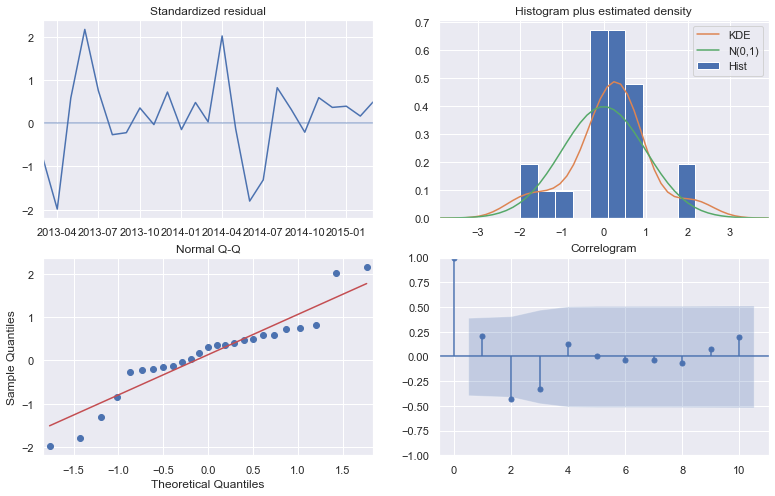

In [568]:
print(output.summary().tables[1])
output.plot_diagnostics(figsize=(13,8));

In [572]:
#full data set
forecast_table = pd.DataFrame()
current = []
forecast_3Yr = []


for zipcode, output, df in zip(Zipcode, models, zip_dfs):
    pred_3 = output.get_forecast(steps = 36)
    pred_conf_3 = pred_3.conf_int()
    forecast_3 = pred_3.predicted_mean.to_numpy()[-1]
    current.append(df['2018-04']['Value'][0])
    forecast_3Yr.append(forecast_3)
    
    
forecast_table['Zipcode'] = Zipcode
forecast_table['Current Value'] = current
forecast_table['3 Years Value'] = forecast_3Yr
forecast_table['3Yr-ROI']=((forecast_table['3 Years Value'] 
                           - forecast_table['Current Value'])/forecast_table['Current Value']*100)


In [573]:
forecast_table.sort_values('3Yr-ROI', ascending=False).head()

,Zipcode,Current Value,3 Years Value,3Yr-ROI,5 Years Value,5Yr-ROI
13,60634,136800.0,1.924061e+05,40.647700,2.121010e+05,55.044618
5,60616,1055300.0,1.281767e+06,21.460000,2.519260e+06,138.724503
16,60647,456200.0,5.384073e+05,18.020004,6.100894e+05,33.732872
2,60613,782800.0,8.860975e+05,13.195894,1.032725e+06,31.927014
17,60649,291500.0,3.097434e+05,6.258447,3.571375e+05,22.517164
